Reading IOS data in Rich's directory using Rob's reader.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime
import pandas as pd
import netCDF4 as nc

from salishsea_tools.nowcast import figures
from salishsea_tools import viz_tools, nc_tools, tidetools
from glob import glob
%matplotlib inline

In [2]:
import ACTDR

In [3]:
ACTDR.load_dat('SOG.dat')

> open  SOG.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG.dat
> complete


In [4]:
def select_cast_month(Month):
    """This function was made to select 
        the cast in the SoG region in the
        specific month """
    
    s_cast = []
    for cast in ACTDR.CTD_DAT:
        if (cast['Longitude'] > -123.5)& (cast['Longitude']<-122.5) & (cast['Latitude']\
             > 48.76) & (cast['Latitude'] < 49.50) & (cast['Month'] == Month):
            s_cast.append(cast)
    return s_cast

In [5]:
def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])

In [6]:
def compare_cast_SoG(imin,imax,jmin,jmax,Month):
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    #map
    ax=axs[0]
    grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
    viz_tools.plot_coastline(ax,grid)
    ax.plot([imin,imax],[jmin,jmin],'r-')
    ax.plot([imin,imax],[jmax,jmax],'r-')
    ax.plot([imin,imin],[jmin,jmax],'r-')
    ax.plot([imax,imax],[jmin,jmax],'r-')
    s_cast = select_cast_month(Month)
    ax=axs[1]
    count = 0
    ##prepare nowcasts results
    for cast in s_cast:
        run_date = datetime.datetime(2014, Month, cast['Day'])
        # Results dataset location
        results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
        results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())
        grid_T_hr = results_dataset('1h', 'grid_T', results_dir)
        sal_hr = grid_T_hr.variables['vosaline']
        depth = grid_T_hr.variables['deptht']
        bathyy, X, Y = tidetools.get_SS2_bathy_data()
        [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
        cast['Latitude'],X,Y,bathyy)
        t = 3 ## how to select t_hour???
        cmap=plt.get_cmap('spectral', 20)
        ax.plot(sal_hr[t, : , x1, y1], depth, marker = '*', c =cmap(cast['Day']-1))
        sal_hr = np.ma.masked_values(sal_hr[t], 0)
        ##profile comparison          
        ax.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
        count=count+1
        ax.axis([0,35,400,0])
        ax.grid('on')   
    return fig

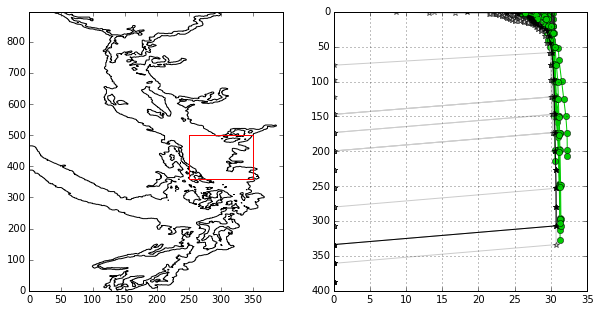

In [7]:
fig = compare_cast_SoG(250, 350, 360, 500, 11)

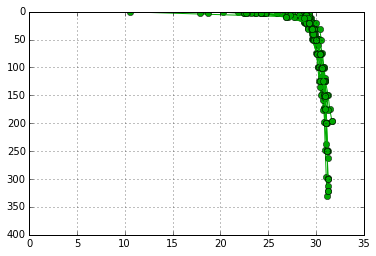

In [29]:
s_cast = select_cast_month(Month = 10)
cmap=plt.get_cmap('spectral', 20)
count=0
for cast in s_cast:
    plt.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
    count=count+1
plt.axis([0,35,400,0])
plt.grid()